# Análise de correlação
* Descrição do algoritmo
  * Pegamos uma hora do dia e fazemos o resample pela média
  * 

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [7]:
raw = pd.read_csv ("../datasets/eloDadosMarço.csv", header=0)
raw.describe()

,id,uid,blocodef,numserie,ta,tb,tc,ampa,ampb,ampc,...,sa,sb,sc,fi_a,fi_b,fi_c,p3,q3,s3,fi_3
count,1.234490e+06,1234490.0,1234490.0,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,...,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06,1.234490e+06
mean,3.202377e+08,1.0,0.0,1.500238e+07,1.153611e+04,1.147138e+04,1.144797e+04,1.051740e+03,9.495422e+02,1.109765e+03,...,8.382418e+01,7.526270e+01,8.770509e+01,9.643201e-01,9.908220e-01,9.868881e-01,2.410939e+02,4.748966e+01,2.467920e+02,9.806085e-01
std,4.362101e+06,0.0,0.0,3.354008e+07,6.327156e+01,5.767271e+01,6.959605e+01,8.316009e+02,7.114074e+02,8.463315e+02,...,6.656852e+01,5.697962e+01,6.717080e+01,2.118943e-02,1.062832e-02,1.358793e-02,1.833919e+02,4.883125e+01,1.902688e+02,1.264910e-02
min,3.127036e+08,1.0,0.0,0.000000e+00,1.122500e+04,1.116700e+04,1.053500e+04,0.000000e+00,0.000000e+00,5.700000e+01,...,1.652634e+00,1.737585e+00,3.479310e+00,3.567822e-03,2.639442e-03,4.473242e-03,7.274613e+00,-4.427884e+03,8.316946e+00,4.413421e-03
25%,3.164463e+08,1.0,0.0,0.000000e+00,1.149600e+04,1.143400e+04,1.140400e+04,3.350000e+02,3.420000e+02,3.880000e+02,...,2.670092e+01,2.698284e+01,3.066659e+01,9.530540e-01,9.858315e-01,9.828722e-01,8.293059e+01,1.323287e+01,8.443363e+01,9.747823e-01
50%,3.202518e+08,1.0,0.0,2.000000e+03,1.153900e+04,1.147400e+04,1.145200e+04,7.980000e+02,7.230000e+02,8.280000e+02,...,6.373936e+01,5.737937e+01,6.560138e+01,9.646493e-01,9.939373e-01,9.885683e-01,1.851909e+02,2.314020e+01,1.872510e+02,9.815203e-01
75%,3.238857e+08,1.0,0.0,1.000000e+04,1.158200e+04,1.151300e+04,1.149800e+04,1.663000e+03,1.462000e+03,1.738000e+03,...,1.325394e+02,1.159973e+02,1.372738e+02,9.758840e-01,9.980174e-01,9.941457e-01,3.776564e+02,7.357752e+01,3.857114e+02,9.876524e-01
max,3.310186e+08,1.0,0.0,9.000819e+07,1.176200e+04,1.168000e+04,1.556400e+04,3.811000e+03,3.306000e+03,3.859000e+03,...,2.144642e+03,2.270316e+03,2.236411e+03,1.000000e+00,1.000000e+00,1.000000e+00,8.299295e+02,4.530629e+03,5.559422e+03,1.000000e+00


In [8]:
## Filtering variables
raw = raw[['momento','ta_real','ampa_real', 'pa', 'fi_a', 'freq',]]
raw['momento'] = pd.to_datetime (raw['momento'])
raw = raw.set_index(raw.momento)
raw = raw.drop ('momento', axis=1)
raw

,ta_real,ampa_real,pa,fi_a,freq
momento,,,,,
2019-04-01 00:00:00,13.8792,2.62,20.022507,0.966290,6000
2019-04-01 00:00:01,13.8768,2.63,20.161071,0.965904,6000
2019-04-01 00:00:02,13.8792,2.63,20.091789,0.965680,6000
2019-04-01 00:00:03,13.8864,2.64,20.230353,0.964458,6000
2019-04-01 00:00:04,13.8960,2.63,20.161071,0.965069,6000
2019-04-01 00:00:05,13.9056,2.61,20.091789,0.966511,6000
2019-04-01 00:00:06,13.9032,2.55,19.745379,0.969539,6000
2019-04-01 00:00:07,13.8888,2.60,20.022507,0.967937,6000
2019-04-01 00:00:08,13.8900,2.63,20.091789,0.964841,6006


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb6fc70f98>,
      dtype=object)

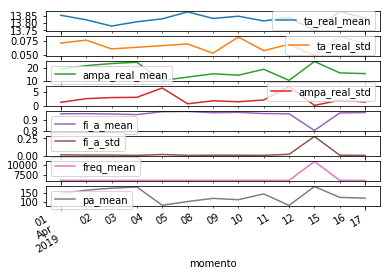

In [9]:
resampled = raw.between_time('18:00:00', '18:59:59').resample('B').agg({
    'ta_real': ['mean', 'std'],
    'ampa_real': ['mean', 'std'],
    'fi_a': ['mean', 'std'],
    'freq': ['mean'],
    'pa': ['mean']
})
resampled.columns = resampled.columns.map('_'.join)
resampled = resampled.dropna()
resampled.plot(subplots=True)

                ta_real_mean  ta_real_std  ampa_real_mean  ampa_real_std  \
ta_real_mean        1.000000     0.722592       -0.673390       0.036985   
ta_real_std         0.722592     1.000000       -0.369243       0.092036   
ampa_real_mean     -0.673390    -0.369243        1.000000      -0.471524   
ampa_real_std       0.036985     0.092036       -0.471524       1.000000   
fi_a_mean           0.727153     0.548247       -0.562588       0.326361   
fi_a_std           -0.659748    -0.523164        0.415024      -0.299397   
freq_mean          -0.660223    -0.526719        0.445227      -0.353367   
pa_mean            -0.656619    -0.355831        0.999548      -0.489060   

                fi_a_mean  fi_a_std  freq_mean   pa_mean  
ta_real_mean     0.727153 -0.659748  -0.660223 -0.656619  
ta_real_std      0.548247 -0.523164  -0.526719 -0.355831  
ampa_real_mean  -0.562588  0.415024   0.445227  0.999548  
ampa_real_std    0.326361 -0.299397  -0.353367 -0.489060  
fi_a_mean        1.0

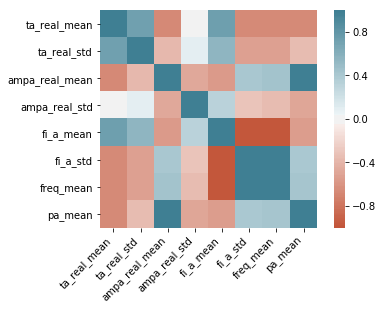

In [38]:
corr = resampled.corr()
print (corr)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

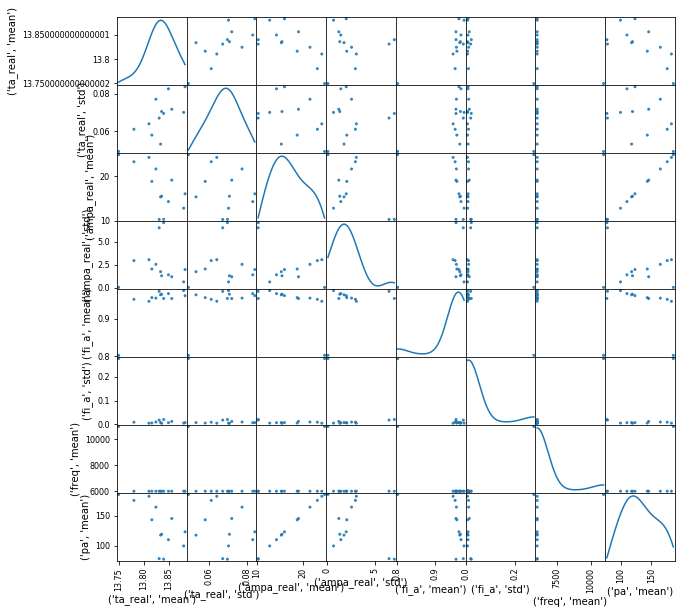

In [32]:
# kde (kernel density estimation): non-parametric way to estimate the probability density function
pd.plotting.scatter_matrix(resampled, alpha=0.9, figsize=(10, 10), diagonal='kde')
plt.show()